In [518]:
import pandas as pd
import matplotlib.pyplot as plt

In [519]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [520]:
df.columns

# Features to use
# "EdLevel", "Country", "YearsCodePro", "Employment", "ConvertedCompYearly"

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [521]:
df = df[['EdLevel', 'Country', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly' : 'Salary'}, axis = 1)
df.head()

,EdLevel,Country,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,9,"Employed, full-time",285000.0
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,23,"Employed, full-time",250000.0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,7,"Employed, full-time",156000.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Philippines,4,"Employed, full-time;Independent contractor, fr...",23456.0


In [522]:
df = df[df['Salary'].notnull()]
df.head()

,EdLevel,Country,YearsCodePro,Employment,Salary
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,9,"Employed, full-time",285000.0
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,23,"Employed, full-time",250000.0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,7,"Employed, full-time",156000.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Philippines,4,"Employed, full-time;Independent contractor, fr...",23456.0
5,Some college/university study without earning ...,United Kingdom of Great Britain and Northern I...,21,"Employed, full-time",96828.0


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EdLevel       48019 non-null  object 
 1   Country       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [524]:
df = df.dropna()
df.isnull().sum()

EdLevel         0
Country         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EdLevel       47813 non-null  object 
 1   Country       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [526]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EdLevel       39155 non-null  object 
 1   Country       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [527]:
df.head()

,EdLevel,Country,YearsCodePro,Salary
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,9,285000.0
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,23,250000.0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,7,156000.0
5,Some college/university study without earning ...,United Kingdom of Great Britain and Northern I...,21,96828.0
6,Some college/university study without earning ...,United States of America,3,135000.0


In [528]:
df['Country'].value_counts()

United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

In [529]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range (len(categories)):
        if categories.values[i] >= cutoff : 
            categorical_map[categories.index[i]] = categories.index[i]
        else :
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [530]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

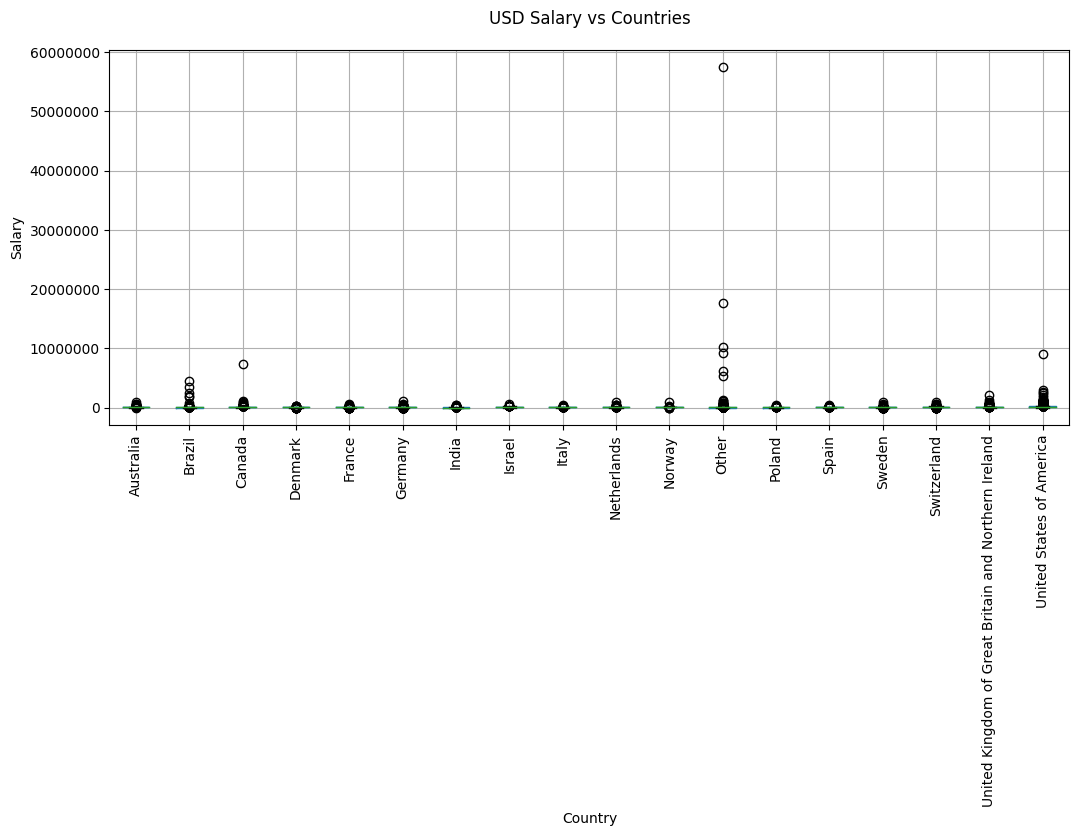

In [531]:
fix, ax = plt.subplots(1, 1, figsize = (12,5))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('USD Salary vs Countries')
plt.ticklabel_format(axis = 'y', style = 'plain', useOffset=False)
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [532]:
df = df[df['Salary'] <= 500000]

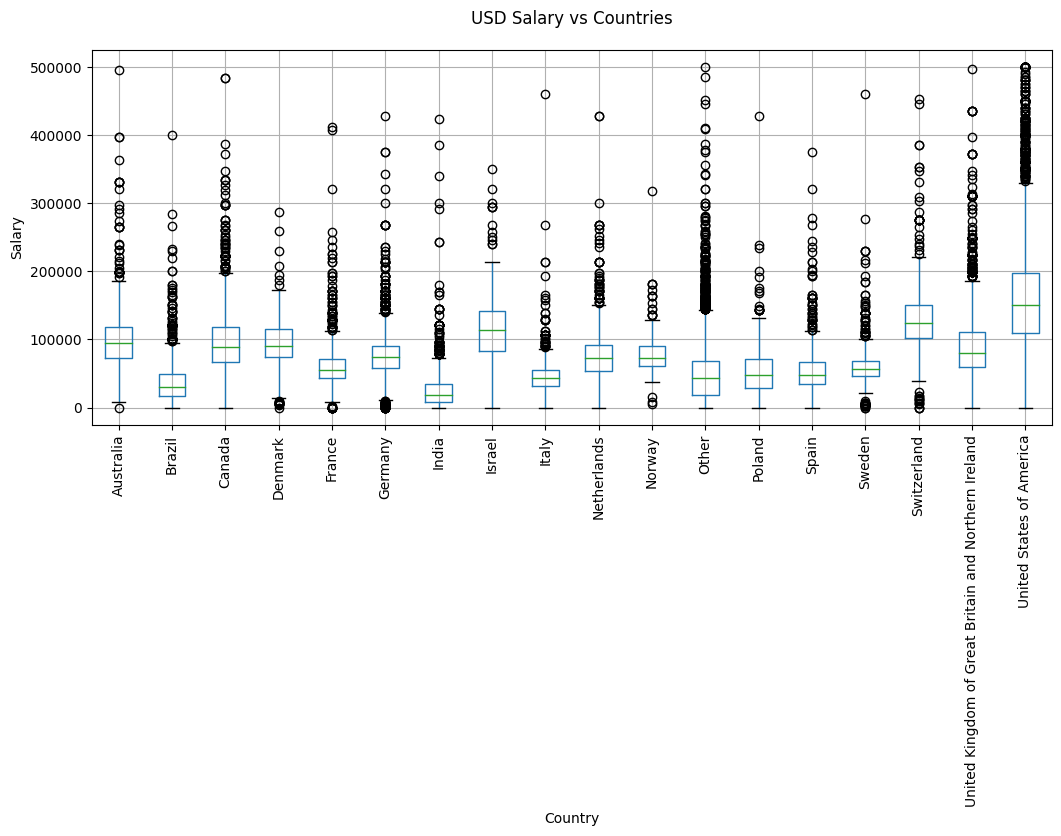

In [533]:
fix, ax = plt.subplots(1, 1, figsize = (12,5))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('USD Salary vs Countries')
plt.ticklabel_format(axis = 'y', style = 'plain', useOffset=False)
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

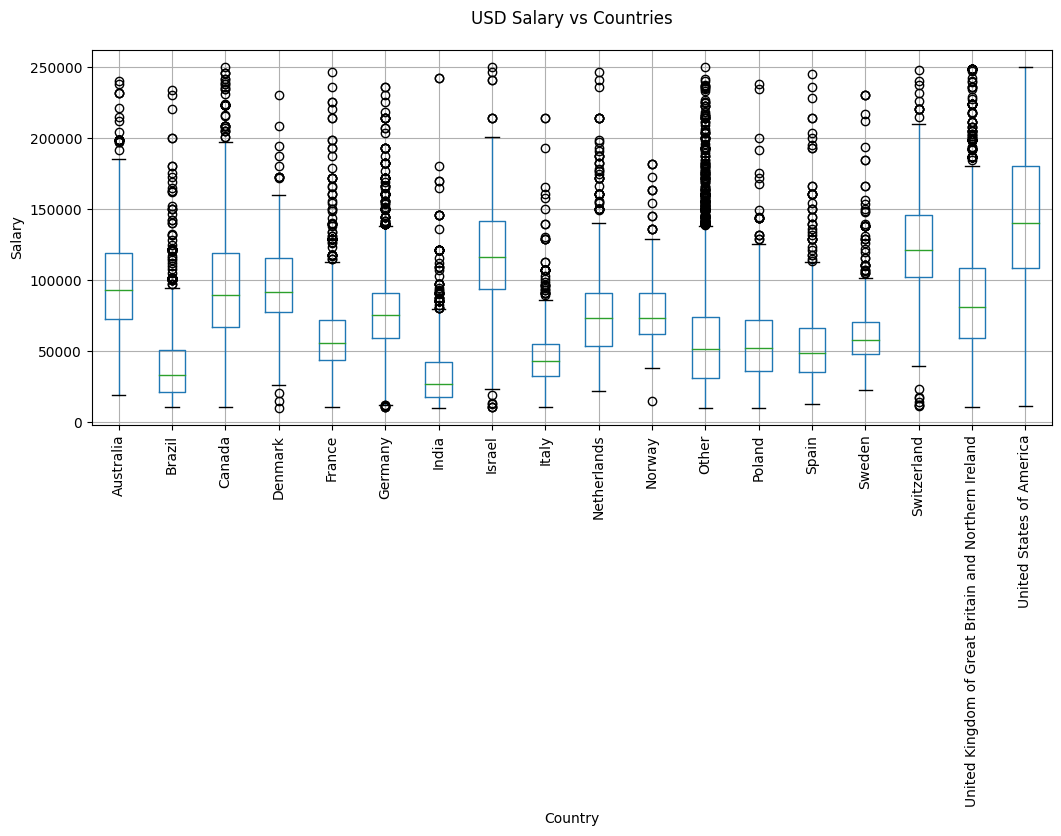

In [534]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
# df = df[df['Country'] != 'Other'] 

fix, ax = plt.subplots(1, 1, figsize = (12,5))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('USD Salary vs Countries')
plt.ticklabel_format(axis = 'y', style = 'plain', useOffset=False)
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [535]:
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '25',
       '12', '20', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

In [536]:
def clean_YearsCodePro(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_YearsCodePro)

In [537]:
df['YearsCodePro'].unique()

array([23. ,  7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. ,  4. , 16. , 28. , 11. ,  8. , 24. , 25. , 12. ,
       20. , 18. , 30. , 27. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [538]:
def clean_EdLevel(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_EdLevel)

In [539]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post Grad'], dtype=object)

In [540]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [541]:
le_education.classes_

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post Grad'], dtype=object)

In [542]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([17, 16, 11,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10,  3,  7,
       12])

In [543]:
le_country.classes_

array(['Australia', 'Brazil', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Netherlands', 'Norway', 'Other',
       'Poland', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [544]:
x = df.drop('Salary', axis = 1)
y = df['Salary']

In [545]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [546]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train.values)

LinearRegression()

In [547]:
print(linear_reg.intercept_)

print(linear_reg.coef_)

31199.575176498576
[-1584.82196705  3690.1609925   1862.23216116]


In [548]:
pd_linreg_coeff = pd.DataFrame(linear_reg.coef_, x.columns, columns = ['Coeff'])
pd_linreg_coeff

,Coeff
EdLevel,-1584.821967
Country,3690.160993
YearsCodePro,1862.232161


In [549]:
y_pred = linear_reg.predict(x_test)

In [550]:
from sklearn import metrics
import numpy as np

print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

36359.200141782465
2077937563.6074908
45584.40044146123


In [551]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train.values)

DecisionTreeRegressor(random_state=0)

In [552]:
y_pred = dt_reg.predict(x_test)

In [553]:
print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

25724.81254385109
1241498145.628964
35234.89954049768


In [554]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(x_train, y_train.values)

RandomForestRegressor(random_state=0)

In [555]:
y_pred = rf_reg.predict(x_test)

In [556]:
print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

25488.813792024757
1215264437.8075588
34860.643106626114


In [502]:
# OMITTING 'Other' in ['Countries']
# $46,035 LIN_REG
# $37,106 DT_REG
# $36,570 RF_REG 


# NOT OMITTING 'Other' in ['Countries']
# $46,630 LIN_REG
# $35,507 DT_REG
# $35,247 RF_REG

In [503]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
min_samples_split = [2,4,6,8,10,12]
min_samples_leaf = [2,4,6,8,10,12]
parameters = {'max_depth' : max_depth}

dt_reg_cv = DecisionTreeRegressor(random_state=0)
gs_dt = GridSearchCV(dt_reg_cv, parameters, scoring='neg_mean_squared_error')
gs_dt.fit(x_train, y_train.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [504]:
dt_reg_cv = gs_dt.best_estimator_

dt_reg_cv.fit(x_train, y_train.values)
y_pred = dt_reg_cv.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

35046.54101381354


In [505]:
max_depth = [None, 2,4,6,8,10,12]
min_samples_split = [2,4,6,8,10,12]
min_samples_leaf = [2,4,6,8,10,12]
parameters = {'max_depth' : max_depth}

rf_reg_cv = RandomForestRegressor(random_state = 0)
gs_rf = GridSearchCV(rf_reg_cv, parameters, scoring='neg_mean_squared_error')
gs_rf.fit(x_train, y_train.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [506]:
rf_reg_cv = gs_rf.best_estimator_

rf_reg_cv.fit(x_train, y_train.values)
y_pred = rf_reg_cv.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

34821.44744379632


In [507]:
x.columns

Index(['EdLevel', 'Country', 'YearsCodePro'], dtype='object')

In [454]:
# Input List
# 'EdLevel', 'Country', 'YearsCodePro'

In [575]:
x_input = x.copy()
x_input.iloc[:] = None

x_input = x_input.dropna()
x_input.isnull().sum()

x_input

,EdLevel,Country,YearsCodePro


In [576]:
new_values = np.array([['Other', 'Bachelor’s degree', 1]])


new_values[:, 0] = le_country.transform(new_values[:,0])
new_values[:, 1] = le_education.transform(new_values[:,1])
new_values = new_values.astype(float)
new_values

array([[11.,  0.,  1.]])

In [577]:
x_input = pd.concat([x_input, new_row], ignore_index=True)

print(x_input)

   EdLevel  Country  YearsCodePro
0     11.0      0.0           1.0


In [578]:
y_pred = rf_reg_cv.predict(x_input)
y_pred

array([63313.80154035])

In [580]:
import pickle

In [581]:
data = {"model": rf_reg_cv, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [582]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [583]:
y_pred = regressor_loaded.predict(x_input)
y_pred

array([63313.80154035])